# **Macro Analysis**

Importing Libraries and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\ummes\\Downloads\\multivariate+gait+data (1).zip")  # update path

print(df.head())
print(df.columns)

   subject  condition  replication  leg  joint  time     angle
0        1          1            1    1      1     0  4.682881
1        1          1            1    1      1     1  5.073127
2        1          1            1    1      1     2  5.229774
3        1          1            1    1      1     3  5.083273
4        1          1            1    1      1     4  4.652399
Index(['subject', 'condition', 'replication', 'leg', 'joint', 'time', 'angle'], dtype='object')


In [2]:
df = df.sort_values(['subject','condition','replication','leg','joint','time']).reset_index(drop=True)

# Feature Engineering

In [3]:
# Compute delta-time and delta-angle within each sequence
df['vel'] = df.groupby(['subject','condition','replication','leg','joint'])['angle'].diff() / \
            df.groupby(['subject','condition','replication','leg','joint'])['time'].diff()


In [4]:
df['acc'] = df.groupby(['subject','condition','replication','leg','joint'])['vel'].diff() / df.groupby(['subject','condition','replication','leg','joint'])['time'].diff()


In [5]:
df['vel'] = df['vel'].interpolate(method='linear', limit_direction='both')

In [6]:
df['acc'] = df['acc'].interpolate(method='linear', limit_direction='both')

In [ ]:
df.isna().sum()  #checking for null values

subject        0
condition      0
replication    0
leg            0
joint          0
time           0
angle          0
vel            0
acc            0
dtype: int64

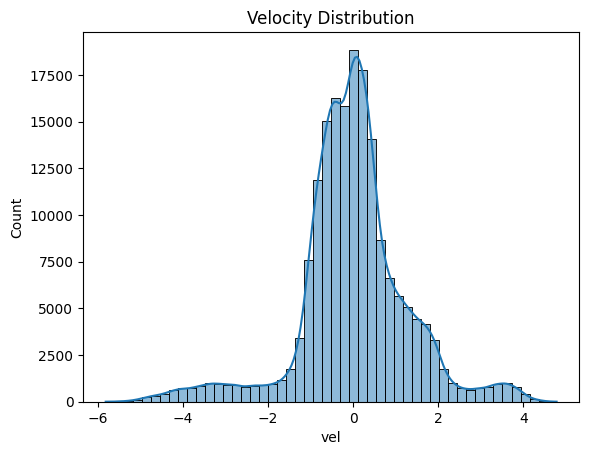

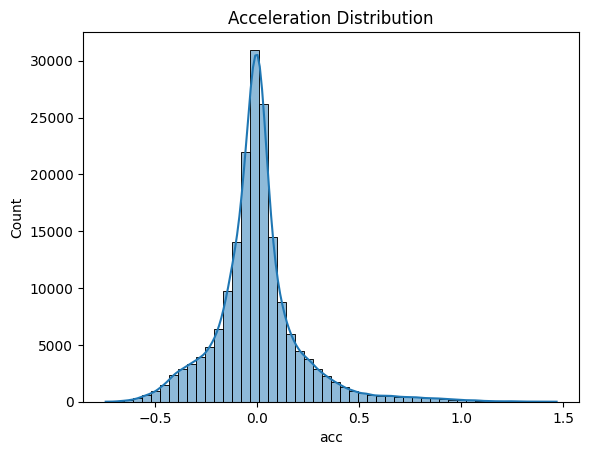

                count       mean        std        min        25%        50%  \
subject      181800.0   5.500000   2.872289   1.000000   3.000000   5.500000   
condition    181800.0   2.000000   0.816499   1.000000   1.000000   2.000000   
replication  181800.0   5.500000   2.872289   1.000000   3.000000   5.500000   
leg          181800.0   1.500000   0.500001   1.000000   1.000000   1.500000   
joint        181800.0   2.000000   0.816499   1.000000   1.000000   2.000000   
time         181800.0  50.000000  29.154840   0.000000  25.000000  50.000000   
angle        181800.0  12.149321  16.025823 -27.004634   1.794457   9.466976   
vel          181800.0  -0.000616   1.294797  -5.812411  -0.600251  -0.011496   
acc          181800.0   0.000922   0.212953  -0.741962  -0.094828  -0.008665   

                   75%         max  
subject       8.000000   10.000000  
condition     3.000000    3.000000  
replication   8.000000   10.000000  
leg           2.000000    2.000000  
joint         

In [8]:
sns.histplot(df['vel'], bins=50, kde=True)
plt.title("Velocity Distribution")
plt.show()

sns.histplot(df['acc'], bins=50, kde=True)
plt.title("Acceleration Distribution")
plt.show()

print(df.describe().T)

In [9]:
df.to_csv("micro_gait_data.csv", index=False)
print("Saved enriched micro dataset with velocity and acceleration.")

Saved enriched micro dataset with velocity and acceleration.


Loading Processed Micro Dataset

In [10]:
df_micro = pd.read_csv("micro_gait_data.csv")

print(df_micro.head())
print(df_micro.shape)

   subject  condition  replication  leg  joint  time     angle       vel  \
0        1          1            1    1      1     0  4.682881  0.390246   
1        1          1            1    1      1     1  5.073127  0.390246   
2        1          1            1    1      1     2  5.229774  0.156647   
3        1          1            1    1      1     3  5.083273 -0.146502   
4        1          1            1    1      1     4  4.652399 -0.430874   

        acc  
0 -0.233599  
1 -0.233599  
2 -0.233599  
3 -0.303149  
4 -0.284372  
(181800, 9)


Reshaping for Macro Analysis

In [11]:
# Define aggregation functions
agg_funcs = {
    'angle': ['mean', 'std', 'min', 'max', 'median'], 
    'vel':   ['mean', 'std', 'min', 'max', 'median'],
    'acc':   ['mean', 'std', 'min', 'max', 'median']
}

# Group and aggregate
df_macro = df_micro.groupby(['subject', 'condition', 'replication']).agg(agg_funcs)

# Flatten multi-level column names
df_macro.columns = ['_'.join(col) for col in df_macro.columns]
df_macro = df_macro.reset_index()

print(df_macro.head())
print(df_macro.shape)


   subject  condition  replication  angle_mean  angle_std  angle_min  \
0        1          1            1   11.556532  15.088670 -15.965032   
1        1          1            2   11.737712  15.977920 -17.492003   
2        1          1            3   11.245866  15.614480 -16.231325   
3        1          1            4   11.559372  15.672279 -16.467403   
4        1          1            5   10.845671  15.326024 -16.289473   

   angle_max  angle_median  vel_mean   vel_std   vel_min   vel_max  \
0  62.445295     10.076578  0.005111  1.313081 -4.692793  3.736549   
1  66.191037      9.966763  0.002502  1.343628 -4.588295  3.838199   
2  65.300057      9.633804 -0.002930  1.381403 -4.981104  3.913851   
3  65.802016      9.500972  0.000439  1.391445 -5.020622  3.967097   
4  64.093660      8.749624 -0.002479  1.362299 -4.997249  3.807093   

   vel_median  acc_mean   acc_std   acc_min   acc_max  acc_median  
0   -0.015406  0.000031  0.216960 -0.551270  1.019209   -0.017769  
1   -0.040

# Exploratory Data Analysis (EDA)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
print(df_macro.info())
print(df_macro.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subject       300 non-null    int64  
 1   condition     300 non-null    int64  
 2   replication   300 non-null    int64  
 3   angle_mean    300 non-null    float64
 4   angle_std     300 non-null    float64
 5   angle_min     300 non-null    float64
 6   angle_max     300 non-null    float64
 7   angle_median  300 non-null    float64
 8   vel_mean      300 non-null    float64
 9   vel_std       300 non-null    float64
 10  vel_min       300 non-null    float64
 11  vel_max       300 non-null    float64
 12  vel_median    300 non-null    float64
 13  acc_mean      300 non-null    float64
 14  acc_std       300 non-null    float64
 15  acc_min       300 non-null    float64
 16  acc_max       300 non-null    float64
 17  acc_median    300 non-null    float64
dtypes: float64(15), int64(3)
memor

In [14]:
print(df_macro.isna().sum())

subject         0
condition       0
replication     0
angle_mean      0
angle_std       0
angle_min       0
angle_max       0
angle_median    0
vel_mean        0
vel_std         0
vel_min         0
vel_max         0
vel_median      0
acc_mean        0
acc_std         0
acc_min         0
acc_max         0
acc_median      0
dtype: int64


In [15]:
print(df_macro['condition'].value_counts())

condition
1    100
2    100
3    100
Name: count, dtype: int64


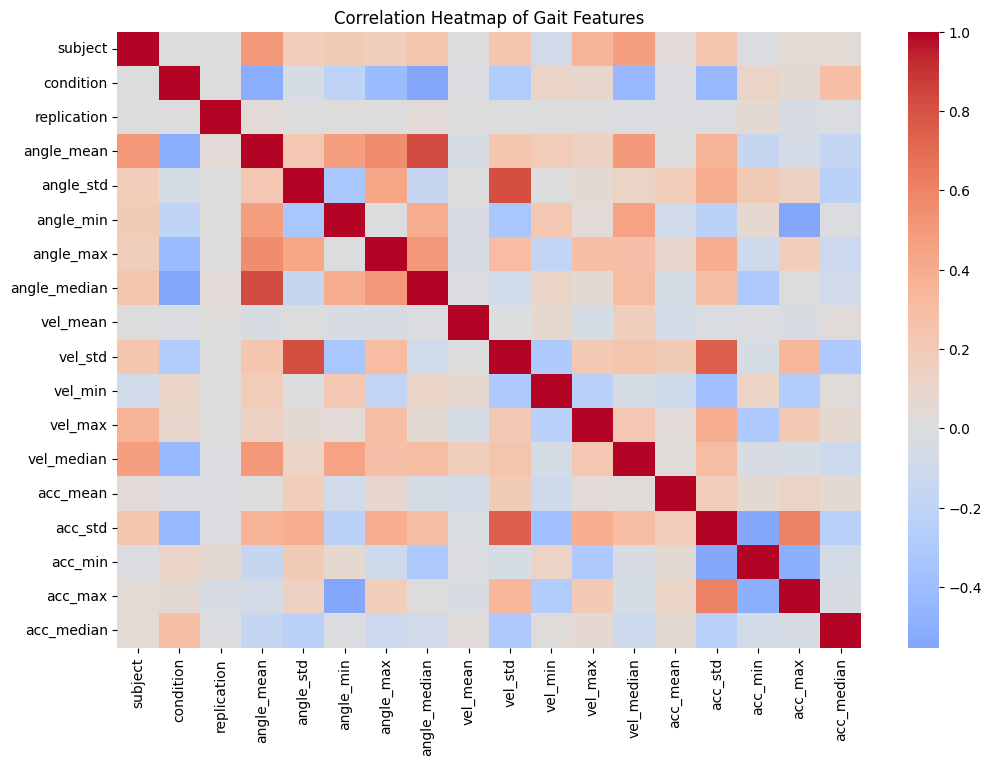

In [16]:
num_cols = df_macro.select_dtypes(include='number').columns
plt.figure(figsize=(12,8))
sns.heatmap(df_macro[num_cols].corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Gait Features")
plt.show()

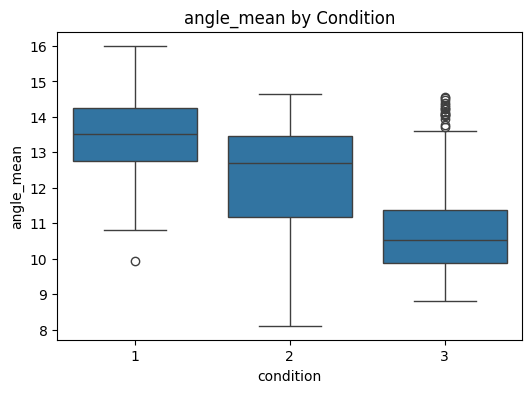

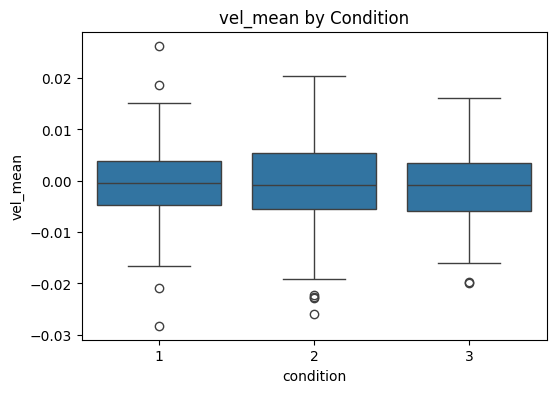

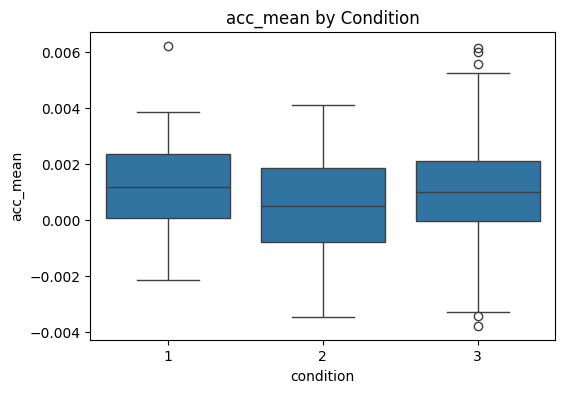

In [17]:
for feature in ['angle_mean', 'vel_mean', 'acc_mean']:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_macro, x='condition', y=feature)
    plt.title(f"{feature} by Condition")
    plt.show()

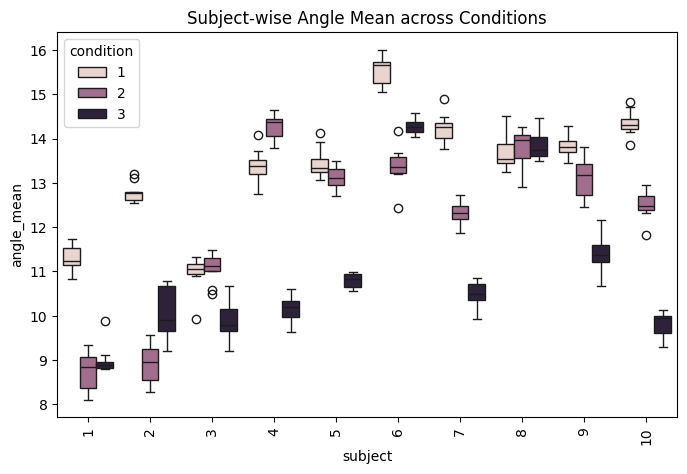

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='subject', y='angle_mean', hue='condition', data=df_macro)
plt.title("Subject-wise Angle Mean across Conditions")
plt.xticks(rotation=90)
plt.show()

# Preprocessing

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [20]:
df = df_macro.copy()


In [21]:
categorical_cols = ['subject', 'replication']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
df_encoded.shape
df_encoded.head()

,condition,angle_mean,angle_std,angle_min,angle_max,angle_median,vel_mean,vel_std,vel_min,vel_max,...,replication_1,replication_2,replication_3,replication_4,replication_5,replication_6,replication_7,replication_8,replication_9,replication_10
0,1,11.556532,15.088670,-15.965032,62.445295,10.076578,0.005111,1.313081,-4.692793,3.736549,...,True,False,False,False,False,False,False,False,False,False
1,1,11.737712,15.977920,-17.492003,66.191037,9.966763,0.002502,1.343628,-4.588295,3.838199,...,False,True,False,False,False,False,False,False,False,False
2,1,11.245866,15.614480,-16.231325,65.300057,9.633804,-0.002930,1.381403,-4.981104,3.913851,...,False,False,True,False,False,False,False,False,False,False
3,1,11.559372,15.672279,-16.467403,65.802016,9.500972,0.000439,1.391445,-5.020622,3.967097,...,False,False,False,True,False,False,False,False,False,False
4,1,10.845671,15.326024,-16.289473,64.093660,8.749624,-0.002479,1.362299,-4.997249,3.807093,...,False,False,False,False,True,False,False,False,False,False


In [22]:
num_cols = [col for col in df_encoded.columns if any(f in col for f in ['angle', 'vel', 'acc'])]
num_cols

['angle_mean',
 'angle_std',
 'angle_min',
 'angle_max',
 'angle_median',
 'vel_mean',
 'vel_std',
 'vel_min',
 'vel_max',
 'vel_median',
 'acc_mean',
 'acc_std',
 'acc_min',
 'acc_max',
 'acc_median']

In [23]:
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [24]:
X = df_encoded.drop(columns=['condition'])
y = df_encoded['condition']


# Anomaly Detection

In [25]:
X_healthy = X[y == 1]
X_test = X[(y == 2) | (y==3) ]

In [26]:
print("All features:", X.shape)
print("Healthy subset:", X_healthy.shape)
print("Anomalous subset:", X_test.shape)
print("Sample features:\n", X.head())


All features: (300, 35)
Healthy subset: (100, 35)
Anomalous subset: (200, 35)
Sample features:
    angle_mean  angle_std  angle_min  angle_max  angle_median  vel_mean  \
0   -0.309428  -0.374495  -0.433020  -1.024857      0.279395  0.722803   
1   -0.214854   0.088593  -0.807227  -0.228145      0.227796  0.393544   
2   -0.471591  -0.100673  -0.498279  -0.417655      0.071347 -0.292112   
3   -0.307945  -0.070573  -0.556134  -0.310889      0.008932  0.133112   
4   -0.680487  -0.250890  -0.512529  -0.674253     -0.344107 -0.235123   

    vel_std   vel_min   vel_max  vel_median  ...  replication_1  \
0  0.179879 -0.299932 -0.695499   -0.236964  ...           True   
1  0.405947 -0.083735 -0.320673   -0.784019  ...          False   
2  0.685498 -0.896419 -0.041715   -1.210156  ...          False   
3  0.759816 -0.978178  0.154626   -1.089345  ...          False   
4  0.544117 -0.929822 -0.435374   -0.968201  ...          False   

   replication_2  replication_3  replication_4  replicat

In [27]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_healthy)    # fit only on healthy data
X_test_scaled = scaler.transform(X_test)      # transform braced data

**USING ISOLATION FOREST**

In [29]:
iso = IsolationForest(
    n_estimators=200,
    contamination=0.1,   # roughly % of anomalies expected
    random_state=42
)
iso.fit(X_scaled)

,n_estimators,200
,max_samples,'auto'
,contamination,0.1
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [30]:
# Scores for both healthy and test data
healthy_scores = iso.decision_function(X_scaled)
test_scores = iso.decision_function(X_test_scaled)

# Predictions (-1 = anomaly, 1 = normal)
healthy_preds = iso.predict(X_scaled)
test_preds = iso.predict(X_test_scaled)


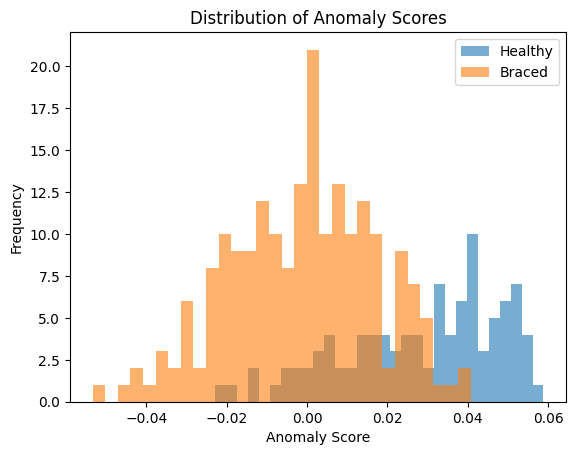

In [31]:
import matplotlib.pyplot as plt

plt.hist(healthy_scores, bins=30, alpha=0.6, label='Healthy')
plt.hist(test_scores, bins=30, alpha=0.6, label='Braced')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.legend()
plt.show()


In [32]:
def gait_health_score(score):
    # Normalize anomaly score to [0, 100]
    return 100 * (score - np.min(score)) / (np.max(score) - np.min(score))

# Compute for braced test data
health_scores = gait_health_score(test_scores)

print("Average gait health score (braced):", np.mean(health_scores))


Average gait health score (braced): 55.619108282751625


In [33]:
n_anomalies = np.sum(test_preds == -1)
print(f"Detected anomalies among braced samples: {n_anomalies}/{len(test_preds)}")


Detected anomalies among braced samples: 97/200


**USING ONE CLASS SVM**

In [39]:
from sklearn.svm import OneClassSVM
svm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')
svm.fit(X_scaled)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,nu,0.05
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [40]:
healthy_scores_svm = svm.decision_function(X_scaled)
test_scores_svm = svm.decision_function(X_test_scaled)

healthy_preds_svm = svm.predict(X_scaled)
test_preds_svm = svm.predict(X_test_scaled)

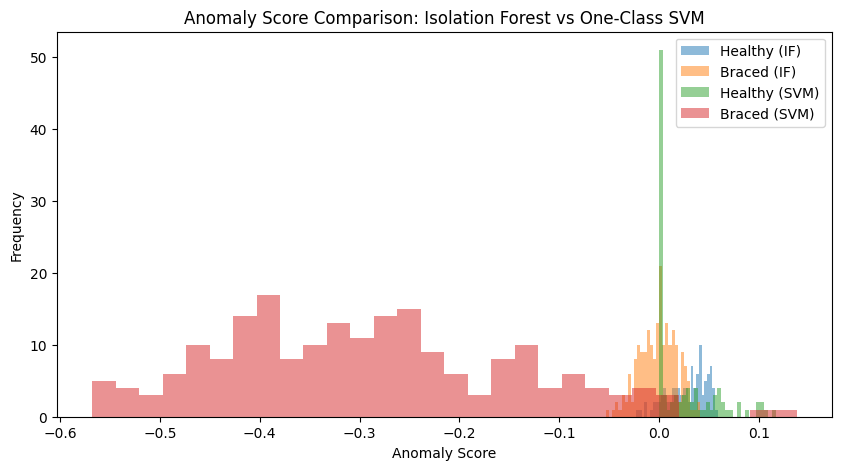

In [41]:
plt.figure(figsize=(10,5))
plt.hist(healthy_scores, bins=30, alpha=0.5, label='Healthy (IF)')
plt.hist(test_scores, bins=30, alpha=0.5, label='Braced (IF)')
plt.hist(healthy_scores_svm, bins=30, alpha=0.5, label='Healthy (SVM)')
plt.hist(test_scores_svm, bins=30, alpha=0.5, label='Braced (SVM)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.title('Anomaly Score Comparison: Isolation Forest vs One-Class SVM')
plt.show()

In [43]:
print("Isolation Forest anomalies:", np.sum(test_preds == -1))
print("One-Class SVM anomalies:", np.sum(test_preds_svm == -1))

Isolation Forest anomalies: 97
One-Class SVM anomalies: 195


In [44]:
def normalize_score(scores):
    return 100 * (scores - np.min(scores)) / (np.max(scores) - np.min(scores))

health_IF = normalize_score(test_scores)
health_SVM = normalize_score(test_scores_svm)

print(f"Mean gait health score (Isolation Forest): {np.mean(health_IF):.2f}")
print(f"Mean gait health score (One-Class SVM): {np.mean(health_SVM):.2f}")

Mean gait health score (Isolation Forest): 55.62
Mean gait health score (One-Class SVM): 38.79


Principal Component Analysis

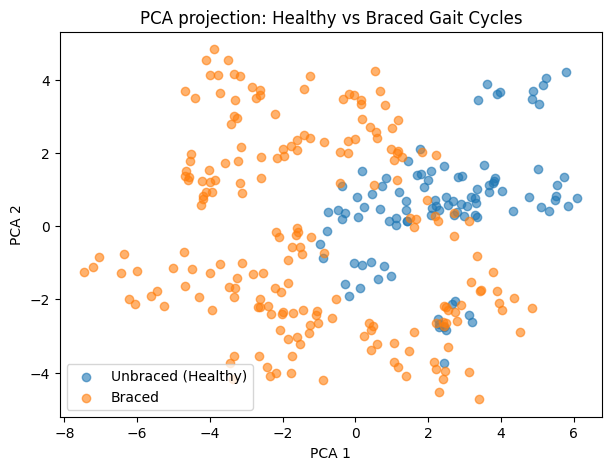

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_all_scaled = np.vstack([X_scaled, X_test_scaled])
labels = np.array([0]*len(X_scaled) + [1]*len(X_test_scaled))

X_pca = pca.fit_transform(X_all_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[labels==0, 0], X_pca[labels==0, 1], alpha=0.6, label='Unbraced (Healthy)')
plt.scatter(X_pca[labels==1, 0], X_pca[labels==1, 1], alpha=0.6, label='Braced')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA projection: Healthy vs Braced Gait Cycles')
plt.legend()
plt.show()

C:\Users\ummes\AppData\Local\Temp\ipykernel_17952\4032640128.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([healthy_scores, test_scores, test_scores_svm], labels=['Healthy (IF)', 'Braced (IF)', 'Braced (SVM)'])


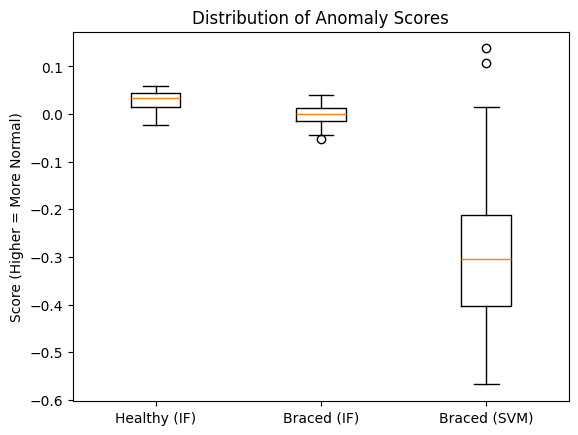

In [46]:
plt.boxplot([healthy_scores, test_scores, test_scores_svm], labels=['Healthy (IF)', 'Braced (IF)', 'Braced (SVM)'])
plt.title("Distribution of Anomaly Scores")
plt.ylabel("Score (Higher = More Normal)")
plt.show()

ENSEMBLING GAIT HEALTH INDEX (IF + SVM)

In [49]:
# Normalize both scores between 0–100
def normalize_score(scores):
    return 100 * (scores - np.min(scores)) / (np.max(scores) - np.min(scores))

health_IF = normalize_score(test_scores)
health_SVM = normalize_score(test_scores_svm)

# Ensemble = weighted average (equal weights here)
ensemble_score = (health_IF + health_SVM) / 2

print("Mean ensemble gait health score for braced cycles:", np.mean(ensemble_score))


Mean ensemble gait health score for braced cycles: 47.202769652175796


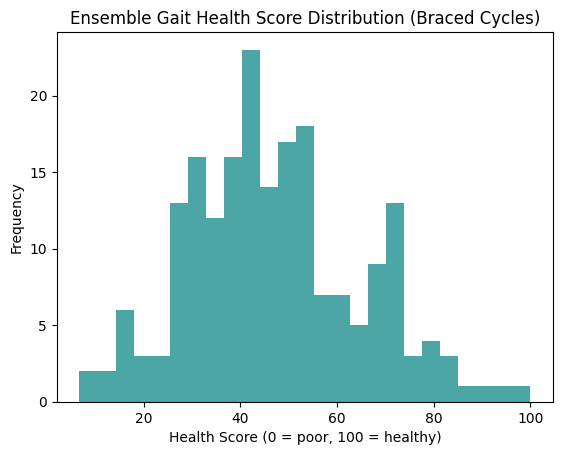

In [48]:
plt.hist(ensemble_score, bins=25, color='teal', alpha=0.7)
plt.title("Ensemble Gait Health Score Distribution (Braced Cycles)")
plt.xlabel("Health Score (0 = poor, 100 = healthy)")
plt.ylabel("Frequency")
plt.show()

# Classification (Predicitng Gait Condition)

In [50]:
# Binary target: 0 = unbraced, 1 = braced
df_macro['condition_binary'] = df_macro['condition'].replace({1: 0, 2: 1, 3: 1})

# Features and target
X = df_macro.drop(columns=['condition', 'condition_binary'])
y = df_macro['condition_binary']

print("Feature matrix:", X.shape)
print("Target vector:", y.shape)
print(y.value_counts())

Feature matrix: (300, 17)
Target vector: (300,)
condition_binary
1    200
0    100
Name: count, dtype: int64


In [67]:
#subject-wise splitting
from sklearn.model_selection import train_test_split
import numpy as np

subjects = df_macro['subject'].unique()

# split subjects, not rows
train_subjects, test_subjects = train_test_split(subjects, test_size=0.3, random_state=42)

train_idx = df_macro['subject'].isin(train_subjects)
test_idx = df_macro['subject'].isin(test_subjects)

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training and Evaluation

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Model Performance Report

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Logistic Regression Results:
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       1.00      0.95      0.97        60

    accuracy                           0.97        90
   macro avg       0.95      0.97      0.96        90
weighted avg       0.97      0.97      0.97        90


Random Forest Results:
Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.78      0.97      0.87        30
           1       0.98      0.87      0.92        60

    accuracy                           0.90        90
   macro avg       0.88      0.92      0.89        90
weighted avg       0.92      0.90      0.90        90



In [73]:
import pandas as pd
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
print("Top 10 Important Features (Random Forest)")
print(feat_importances.sort_values(ascending=False).head(10))

Top 10 Important Features (Random Forest)
vel_std         0.206579
angle_std       0.150699
acc_std         0.109617
angle_median    0.108735
angle_mean      0.095238
acc_median      0.064091
vel_median      0.048139
angle_max       0.042175
vel_max         0.041483
vel_min         0.031744
dtype: float64


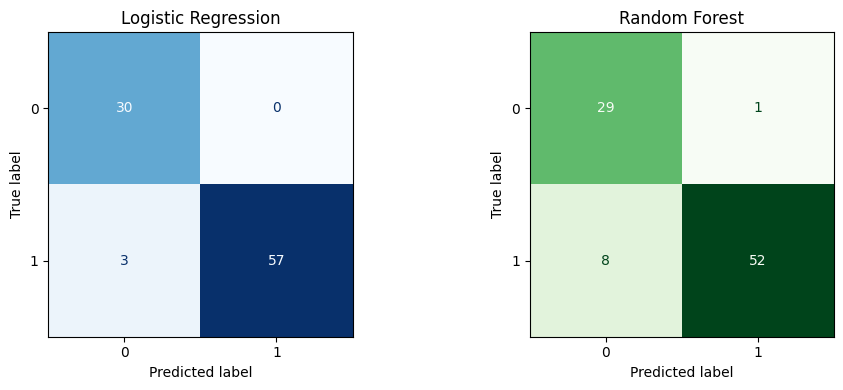

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, ax=ax[0], cmap="Blues", colorbar=False)
ax[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=ax[1], cmap="Greens", colorbar=False)
ax[1].set_title("Random Forest")

plt.tight_layout()
plt.show()

# Conclusion

- Visualization and anomaly detection helped identify potential outliers and class separability.
- The modeling stage demonstrated how macro-features can distinguish gait conditions effectively.